In [8]:
import pandas as pd
import hvplot.pandas
import os
import numpy as np
from pathlib import Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [9]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
# Set the ticker
ticker = ["PENN", "MGM", "CHDN", "FOX"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-03-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
niall_portfolio = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

niall_portfolio.head()

CHDN                                    FOX  \
                            open    high    low  close    volume   open   
time                                                                      
2019-03-25 00:00:00-04:00  84.75  86.735  84.25  86.03  171289.0  37.57   
2019-03-26 00:00:00-04:00  87.05  88.200  85.73  86.85  185309.0  36.46   
2019-03-27 00:00:00-04:00  86.79  87.400  84.72  85.72  173464.0  36.75   
2019-03-28 00:00:00-04:00  86.13  88.750  86.13  88.39  242807.0  36.14   
2019-03-29 00:00:00-04:00  88.41  91.120  88.41  90.18  312007.0  35.88   

                                                           MGM          \
                            high    low  close   volume   open    high   
time                                                                     
2019-03-25 00:00:00-04:00  37.81  36.35  36.44  3211772  26.04  26.410   
2019-03-26 00:00:00-04:00  37.35  36.46  36.71  2815218  25.85  26.130   
2019-03-27 00:00:00-04:00  37.17  36.06  36.20  2631209  25.75  25.780   
2019-03-28 00:00:00-04:00  36.47  35.55  35.67  1790626  25.02  25.855   
2019-03-29 00:00:00-04:00  36.17  35.39  35.88  1981327  25.69  26.070   

                                                    PENN                       \
                              low  close   volume   open   high    low  close   
time                                                                            
2019-03-25 00:00:00-04:00  25.725  25.75  5540964  20.19  20.33  19.84  20.02   
2019-03-26 00:00:00-04:00  25.560  25.78  4547117  19.83  20.38  19.76  19.99   
2019-03-27 00:00:00-04:00  24.855  25.00  8314953  20.04  20.04  19.48  19.74   
2019-03-28 00:00:00-04:00  25.020  25.44  7553829  19.77  20.33  19.45  19.80   
2019-03-29 00:00:00-04:00  25.490  25.66  5639565  20.01  20.36  19.87  20.10   

                                      
                              volume  
time                                  
2019-03-25 00:00:00-04:00  1234067.0  
2019-03-26 00:00:00-04:00  1661558.0  
2019-03-27 00:00:00-04:00  1516170.0  
2019-03-28 00:00:00-04:00  1705574.0  
2019-03-29 00:00:00-04:00  2316419.0

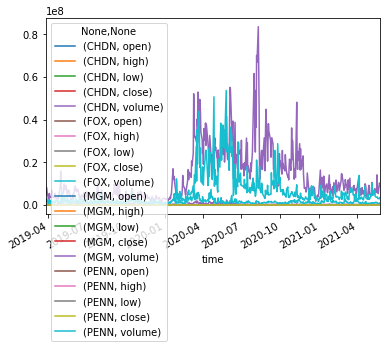

In [15]:
niall_portfolio.plot()

In [19]:
niall_portfolio_prices = pd.DataFrame()
niall_portfolio_prices['PENN'] = niall_portfolio['PENN']['close']
niall_portfolio_prices['MGM'] = niall_portfolio['MGM']['close']
niall_portfolio_prices['CHDN'] = niall_portfolio['CHDN']['close']
niall_portfolio_prices['FOX'] = niall_portfolio['FOX']['close']
niall_portfolio_prices.index = niall_portfolio_prices.index.date
niall_portfolio_prices.head(10)

,PENN,MGM,CHDN,FOX
2019-03-25,20.02,25.75,86.03,36.44
2019-03-26,19.99,25.78,86.85,36.71
2019-03-27,19.74,25.00,85.72,36.20
2019-03-28,19.80,25.44,88.39,35.67
2019-03-29,20.10,25.66,90.18,35.88
2019-04-01,20.45,26.60,90.65,36.15
2019-04-02,20.80,26.79,89.80,35.70
2019-04-03,20.99,27.01,90.65,35.50
2019-04-04,20.88,27.15,90.35,36.02
2019-04-05,21.37,27.44,92.05,36.98


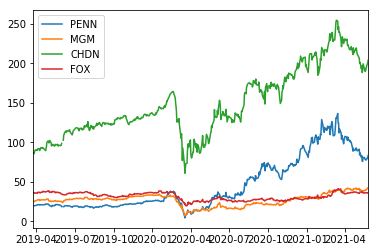

In [21]:
niall_portfolio_prices.plot()

In [38]:

niall_five_year = MCSimulation(
    portfolio_data = niall_portfolio,
    weights = [.25, .25, .25, .25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
niall_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012521,1.040615,0.973855,1.036817,1.028008,0.973321,1.010607,0.984860,1.012695,1.014493,...,1.000175,1.027486,0.978648,1.029089,0.986261,0.981782,0.971340,1.015281,0.971098,1.006141
2,1.002054,1.064549,1.001226,1.081965,1.023497,0.963727,1.002330,0.994971,1.037972,1.017672,...,1.041109,1.014377,1.024836,1.033567,0.973013,0.971733,0.954072,1.010863,0.949087,1.018718
3,0.965862,1.068356,1.060229,1.053687,1.036314,0.989553,0.982470,0.992629,1.047757,1.039933,...,1.018148,1.032711,0.995264,1.056555,0.959282,0.964075,0.982315,1.017556,1.005924,1.025422
4,0.976460,1.072473,1.075611,1.044398,1.043832,1.023969,0.998172,1.002397,1.056436,1.076835,...,0.994381,1.072157,1.004390,1.055457,0.952478,0.948222,0.965085,1.024389,1.034137,0.989047
5,0.986288,1.108610,1.057252,1.090968,1.095456,1.010163,1.009196,1.020816,1.040672,1.053744,...,0.979894,1.076155,1.016042,1.044302,0.949320,0.938623,0.977023,1.048781,1.064059,0.988712
6,0.987873,1.137610,1.059870,1.080660,1.110306,1.014097,0.968840,1.038068,1.046429,1.049864,...,1.004362,1.076733,1.055606,1.034735,0.936274,0.963024,1.001067,1.034069,1.090603,1.010971
7,0.983438,1.192120,1.045803,1.071328,1.093037,1.030563,0.931750,1.024427,1.035090,1.030405,...,1.014858,1.064385,1.049488,1.043657,0.938337,0.962746,0.997137,1.016968,1.074562,0.997826
8,1.000878,1.163284,1.063758,1.047099,1.111841,1.053821,0.912229,1.026810,1.045646,1.013384,...,1.050447,1.077052,1.042781,1.040448,0.929145,0.974093,1.001507,1.018546,1.130420,1.006331
9,0.968209,1.174212,1.023951,1.009278,1.109407,1.100561,0.932200,1.032050,1.023395,1.029364,...,1.005170,1.079509,1.040252,1.044509,0.941171,0.977225,1.003695,0.980670,1.121442,1.041746


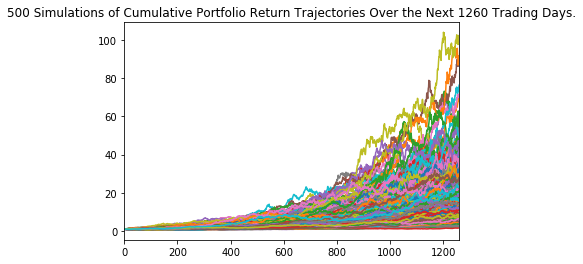

In [32]:
niall_simulation = niall_five_year.plot_simulation()

In [39]:
tbl = niall_five_year.summarize_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [40]:
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)


print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $31010.07 and $600376.36.


In [47]:
# Set the ticker
ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2021-01-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-30", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
all_stocks = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

all_stocks.head()

ATVI                                   BYD         \
                            open   high    low  close    volume   open   high   
time                                                                            
2021-01-22 00:00:00-05:00  94.68  95.23  93.82  94.43   3212422  49.15  50.28   
2021-01-25 00:00:00-05:00  95.53  95.76  92.74  93.39   4865938  49.84  50.77   
2021-01-26 00:00:00-05:00  93.35  93.68  92.14  92.38   5917447  49.49  49.60   
2021-01-27 00:00:00-05:00  91.00  91.00  88.21  88.66  11195033  46.20  46.79   
2021-01-28 00:00:00-05:00  89.57  91.42  89.01  90.28   6117259  46.51  47.54   

                                                  ...    TTWO           \
                             low  close   volume  ...    open     high   
time                                              ...                    
2021-01-22 00:00:00-05:00  48.66  50.08   634127  ...  204.92  206.700   
2021-01-25 00:00:00-05:00  48.08  48.95   986836  ...  207.77  208.710   
2021-01-26 00:00:00-05:00  47.08  47.40   823673  ...  203.77  204.080   
2021-01-27 00:00:00-05:00  44.42  45.73  1524824  ...  200.28  201.065   
2021-01-28 00:00:00-05:00  45.03  46.00  1271666  ...  195.48  203.000   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2021-01-22 00:00:00-05:00  202.79  204.62   645020  52.60  55.60  52.2300   
2021-01-25 00:00:00-05:00  201.67  203.91   698737  56.25  56.99  53.2600   
2021-01-26 00:00:00-05:00  199.29  199.73   754480  55.69  57.66  54.5100   
2021-01-27 00:00:00-05:00  193.75  195.41  1161661  57.07  60.00  56.8801   
2021-01-28 00:00:00-05:00  195.48  200.31   924351  57.25  58.12  55.8800   

                                           
                           close   volume  
time                                       
2021-01-22 00:00:00-05:00  55.53   991206  
2021-01-25 00:00:00-05:00  53.94  2564183  
2021-01-26 00:00:00-05:00  57.47  1585532  
2021-01-27 00:00:00-05:00  57.44  3453994  
2021-01-28 00:00:00-05:00  56.58   832160  

[5 rows x 65 columns]

In [52]:
all_stocks_five_year = MCSimulation(
    portfolio_data = all_stocks,
    weights = [.077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [53]:
all_stocks_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003809,0.996982,1.014818,1.011496,1.004828,0.990559,1.015912,1.008258,1.008597,0.991665,...,0.997466,1.006358,1.005998,0.991597,1.008196,1.007815,0.994029,0.989692,0.991103,1.005449
2,1.008481,0.992098,0.999896,1.012207,1.009108,0.975290,1.010822,1.009778,1.021673,0.991863,...,1.002082,1.024984,1.016718,0.987120,1.014677,1.022710,0.995276,0.983334,0.989562,1.002628
3,1.012657,0.997508,1.003321,1.009392,1.000701,0.972375,1.027976,1.001685,1.032109,0.990306,...,1.013016,1.026066,0.999450,0.985797,1.019390,1.016598,0.993190,0.999580,0.989185,0.992561
4,1.006774,1.007142,0.983884,1.009065,0.989709,0.953931,1.037763,1.004420,1.011924,1.009326,...,1.009586,1.027870,1.014452,1.004445,1.009195,1.015071,0.990841,1.007126,0.983185,0.993325
5,1.011161,1.004762,0.985989,1.010214,0.987966,0.954122,1.048821,1.000862,1.013626,0.991968,...,1.012304,1.027214,1.017278,1.004206,1.002331,1.023477,0.980854,1.008239,0.977982,0.994208
6,1.023588,1.009681,0.982919,0.999585,0.983962,0.956936,1.061506,1.002458,1.036656,0.979088,...,1.007460,1.030037,1.006621,0.984939,0.995441,1.007947,0.987134,1.006164,0.979794,0.993175
7,1.009294,1.023373,0.973848,1.004417,0.988217,0.965546,1.050004,1.009712,1.043625,0.991038,...,1.007940,1.033975,0.999576,0.984627,0.993433,1.000839,0.995434,0.993850,0.973434,0.999435
8,1.020086,1.029201,0.973614,1.001520,0.981305,0.964644,1.025147,1.021230,1.038724,0.994790,...,1.006324,1.036755,1.006698,0.985239,1.013637,1.001922,0.993131,0.987812,0.966054,0.993577
9,1.035848,1.019851,0.991638,1.007434,0.983551,0.972271,1.024883,1.042681,1.041236,0.997705,...,1.011660,1.041378,0.998069,0.991038,1.024303,1.001849,0.984487,0.986019,0.956567,0.990473


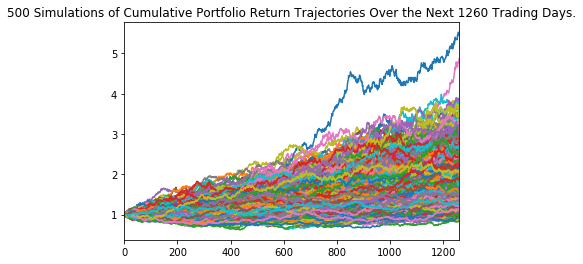

In [76]:
all_stocks_five_year.plot_simulation()

In [73]:
tbl_two = all_stocks_five_year.summarize_cumulative_return()

In [74]:
ci_lower = round(tbl_two[8]*1000000,2)
ci_upper = round(tbl_two[9]*1000000,2)


print(f"There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio post-pandemic"
      f" over the next 5 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio post-pandemic over the next 5 year will end within in the range of $994099.24 and $3310145.62.


In [59]:
all_stocks_prices = pd.DataFrame()
all_stocks_prices['PENN'] = all_stocks['PENN']['close']
all_stocks_prices['MGM'] = all_stocks['MGM']['close']
all_stocks_prices['CHDN'] = all_stocks['CHDN']['close']
all_stocks_prices['FOX'] = all_stocks['FOX']['close']
all_stocks_prices['EA'] = all_stocks['EA']['close']
all_stocks_prices['ATVI'] = all_stocks['ATVI']['close']
all_stocks_prices['TTWO'] = all_stocks['TTWO']['close']
all_stocks_prices['NVDA'] = all_stocks['NVDA']['close']
all_stocks_prices['BYD'] = all_stocks['BYD']['close']
all_stocks_prices['DKNG'] = all_stocks['DKNG']['close']
all_stocks_prices['FUBO'] = all_stocks['FUBO']['close']
all_stocks_prices['WWE'] = all_stocks['WWE']['close']
all_stocks_prices['NKE'] = all_stocks['NKE']['close']

all_stocks_prices.index = all_stocks.index.date
all_stocks_prices.head(10)

,PENN,MGM,CHDN,FOX,EA,ATVI,TTWO,NVDA,BYD,DKNG,FUBO,WWE,NKE
2021-01-22,109.40,31.37,214.35,29.170,146.01,94.43,204.62,548.50,50.08,52.5000,37.760,55.53,139.3200
2021-01-25,104.04,29.97,204.85,30.690,146.37,93.39,203.91,546.39,48.95,51.3300,40.970,53.94,137.5500
2021-01-26,99.51,29.59,197.61,33.410,146.28,92.38,199.73,537.41,47.40,54.0600,43.920,57.47,135.1000
2021-01-27,97.71,28.37,184.83,32.475,146.24,88.66,195.41,517.05,45.73,54.3200,46.670,57.44,131.0200
2021-01-28,107.01,29.55,195.45,30.610,142.94,90.28,200.31,521.93,46.00,56.1700,39.905,56.58,134.6700
2021-01-29,103.78,28.55,187.06,29.881,143.15,91.01,200.36,519.03,45.14,54.1389,42.240,56.34,133.6200
2021-02-01,103.98,29.28,196.07,30.640,145.81,91.42,200.95,529.48,46.07,54.6400,52.390,57.58,135.7100
2021-02-02,110.56,30.65,205.97,29.560,149.03,93.98,207.23,542.28,47.88,59.3000,48.455,57.16,139.4700
2021-02-03,109.25,30.89,203.57,29.150,140.65,92.77,202.66,541.12,48.02,60.1200,49.060,56.50,138.6300
2021-02-04,118.35,32.48,211.17,29.330,138.70,92.68,201.49,546.57,50.42,63.1700,50.990,56.02,140.6298


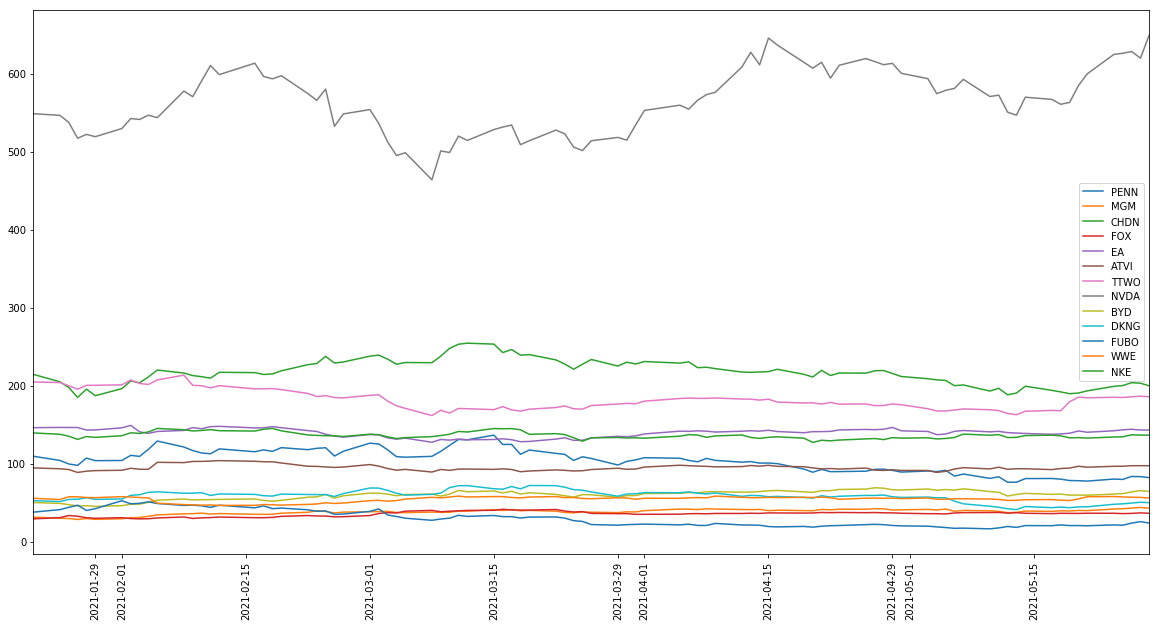

In [126]:
all_stocks_prices.plot.line(figsize=(20,10), rot=90)

In [61]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
all_stocks_two_year = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

all_stocks_two_year.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 65 columns]

In [63]:
all_stocks_prices_two = pd.DataFrame()
all_stocks_prices_two['PENN'] = all_stocks_two_year['PENN']['close']
all_stocks_prices_two['MGM'] = all_stocks_two_year['MGM']['close']
all_stocks_prices_two['CHDN'] = all_stocks_two_year['CHDN']['close']
all_stocks_prices_two['FOX'] = all_stocks_two_year['FOX']['close']
all_stocks_prices_two['EA'] = all_stocks_two_year['EA']['close']
all_stocks_prices_two['ATVI'] = all_stocks_two_year['ATVI']['close']
all_stocks_prices_two['TTWO'] = all_stocks_two_year['TTWO']['close']
all_stocks_prices_two['NVDA'] = all_stocks_two_year['NVDA']['close']
all_stocks_prices_two['BYD'] = all_stocks_two_year['BYD']['close']
all_stocks_prices_two['DKNG'] = all_stocks_two_year['DKNG']['close']
all_stocks_prices_two['FUBO'] = all_stocks_two_year['FUBO']['close']
all_stocks_prices_two['WWE'] = all_stocks_two_year['WWE']['close']
all_stocks_prices_two['NKE'] = all_stocks_two_year['NKE']['close']

all_stocks_prices_two.index = all_stocks_two_year.index.date
all_stocks_prices_two.head(10)

,PENN,MGM,CHDN,FOX,EA,ATVI,TTWO,NVDA,BYD,DKNG,FUBO,WWE,NKE
2019-05-28,20.590,25.33,95.97,36.17,93.50,43.500,106.51,143.30,25.490,NaN,NaN,74.07,81.18
2019-05-29,20.320,25.35,95.81,35.29,92.55,43.990,106.99,140.31,25.080,NaN,NaN,72.50,78.85
2019-05-30,19.740,25.34,96.36,34.82,92.14,43.560,106.98,139.11,24.250,NaN,NaN,72.51,79.24
2019-05-31,18.835,24.83,98.58,34.71,93.07,43.360,108.15,135.46,23.925,NaN,NaN,72.73,77.14
2019-06-03,NaN,23.86,NaN,33.78,91.30,42.370,105.95,133.78,22.960,NaN,NaN,72.74,78.01
2019-06-04,18.790,25.65,102.78,34.08,94.13,43.620,109.00,143.02,24.040,NaN,NaN,73.12,81.62
2019-06-05,18.670,25.96,109.13,34.02,95.26,44.530,111.55,141.33,23.830,NaN,NaN,73.69,82.74
2019-06-06,18.870,26.50,110.28,33.74,96.39,44.110,110.71,143.79,24.180,NaN,NaN,73.50,82.47
2019-06-07,19.720,26.27,112.27,33.68,96.98,45.385,111.61,145.50,25.070,NaN,NaN,73.28,83.41
2019-06-10,20.070,27.42,114.18,33.75,95.52,46.000,111.78,148.45,25.650,NaN,NaN,71.51,82.57


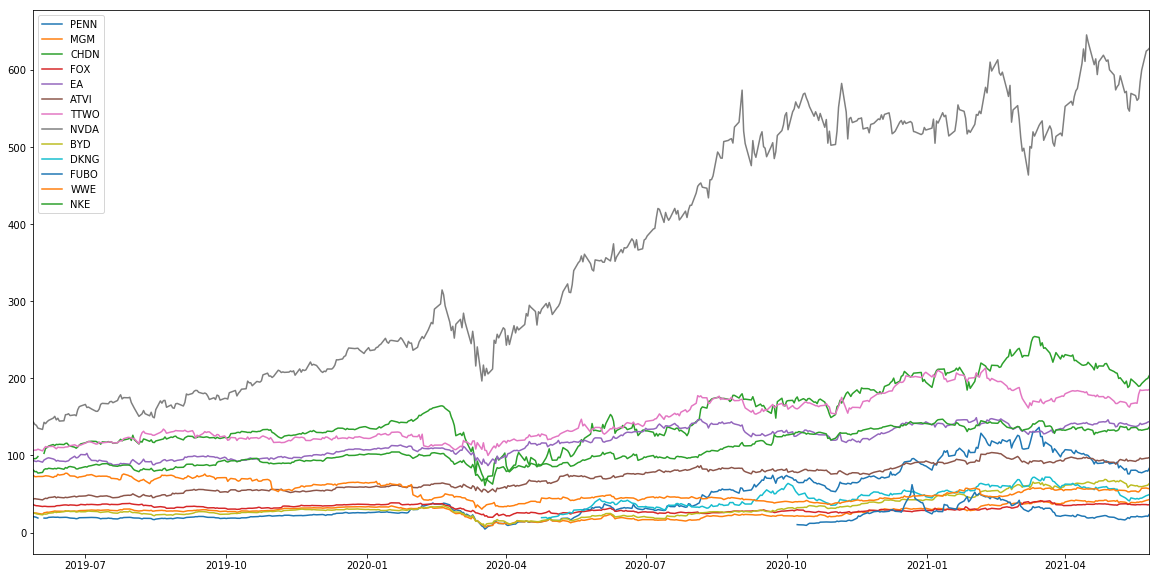

In [71]:
all_stocks_prices_two.plot(figsize=(20,10))

In [79]:
through_covid_prediction = MCSimulation(
    portfolio_data = all_stocks_two_year,
    weights = [.077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077, .077],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [80]:
through_covid_prediction.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012644,0.990547,0.983633,1.016048,1.008695,1.020759,0.996984,1.008388,1.017163,0.991576,...,0.997584,1.014892,1.013464,1.003319,0.982238,1.016381,0.994518,1.003868,0.988033,1.022694
2,1.006866,0.986418,0.970894,1.038914,1.013479,1.038242,0.984142,1.011495,1.024811,0.990383,...,0.980790,1.019902,1.020842,1.018223,0.981708,1.026010,1.005109,0.989904,0.986496,1.028220
3,1.001189,0.974290,0.953209,1.032222,1.024202,1.028880,0.992209,1.017359,1.035372,1.005941,...,0.981659,1.043223,1.026099,1.021406,0.973737,1.040374,1.012801,0.976020,0.999625,1.007142
4,1.003099,0.984942,0.944610,1.013721,1.012052,1.027116,1.011917,1.018608,1.039728,1.029323,...,0.984686,1.034166,1.030966,1.026196,0.964899,1.047451,1.025220,0.969046,1.016687,1.014317
5,1.002437,0.993041,0.945608,1.028317,0.998009,1.030065,1.036265,1.024502,1.042644,1.031652,...,0.995309,1.023560,1.011235,1.037276,0.959137,1.042771,1.047699,0.973728,1.025738,1.011467
6,0.993419,1.008082,0.946033,1.021611,0.991731,1.029096,1.038990,1.022359,1.044434,1.014597,...,0.984185,1.032460,1.019525,1.037390,0.959368,1.063398,1.041409,0.996200,1.017913,1.025949
7,0.994875,1.000947,0.939138,1.013048,1.011256,1.032743,1.047182,1.014920,1.042874,1.016176,...,0.982460,1.036966,1.020053,1.020468,0.967161,1.082919,1.065723,1.003971,1.024725,1.020430
8,1.001904,0.993307,0.935795,1.026534,1.016854,1.048166,1.046517,1.021302,1.050549,1.028029,...,0.990397,1.039109,1.032762,1.031237,0.953346,1.090052,1.064691,1.008945,1.045758,1.039147
9,0.999305,1.031541,0.935639,1.031609,1.009609,1.059249,1.045438,1.031641,1.064099,1.039876,...,0.993902,1.037537,1.030346,1.035890,0.954724,1.095560,1.050518,0.994011,1.042514,1.052347


In [81]:
tbl_three = through_covid_prediction.summarize_cumulative_return()

In [82]:
ci_lower = round(tbl_three[8]*1000000,2)
ci_upper = round(tbl_three[9]*1000000,2)


print(f"There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio through the pandemic"
      f" over the next 5 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio through the pandemic over the next 5 year will end within in the range of $12150201.65 and $52527374.87.


In [89]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-26", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
no_covid = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

no_covid.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 55 columns]

In [90]:
no_covid_prediction = MCSimulation(
    portfolio_data = no_covid,
    weights = [.091, .091, .091, .091, .091, .091, .091, .091, .091, .091, .091],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [91]:
no_covid_prediction.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994716,1.006340,0.995883,1.000641,0.988567,1.014241,0.982392,0.999258,1.006993,0.996825,...,0.993941,0.989995,1.007582,1.013832,1.006016,0.995073,1.010235,1.000407,0.991797,0.999523
2,1.018880,1.013466,0.994754,0.980460,0.986835,1.025648,0.988601,1.005548,0.987868,0.989033,...,0.993296,1.000939,1.034651,1.005637,0.984719,0.994657,1.032819,0.980455,1.002522,1.003327
3,1.049314,1.021346,0.984029,0.964780,0.980535,1.041238,0.982709,1.007539,1.000283,0.994107,...,1.011661,1.010476,1.051360,1.012360,0.984049,0.982681,1.066242,0.958283,1.016049,1.012238
4,1.044465,1.027452,0.980171,0.958078,0.984901,1.073852,0.960051,1.008590,1.007219,1.004284,...,0.981945,1.022095,1.044575,1.013761,0.975865,0.966414,1.065737,0.954612,1.029467,1.002253
5,1.055474,1.033392,0.998000,0.942936,0.981247,1.086910,0.983238,1.008373,1.009992,0.979429,...,0.990075,1.007282,1.075636,1.006859,0.991797,0.971678,1.062079,0.947554,1.047151,1.012954
6,1.072446,1.048931,0.989748,0.953214,0.984832,1.092938,0.983849,0.998445,1.007023,0.981825,...,0.990236,1.012726,1.058634,1.021383,1.006415,0.971568,1.045134,0.956336,1.036608,1.019634
7,1.066681,1.035315,1.007902,0.982316,0.982510,1.107004,0.972617,1.004841,1.035090,0.976005,...,1.007364,1.021965,1.050002,1.018869,1.016947,0.982956,1.053614,0.961162,1.039599,1.010629
8,1.068011,1.004302,0.995207,0.983417,0.986450,1.114683,0.961255,0.999044,1.053921,0.980769,...,1.013555,1.023106,1.043882,1.029137,1.028711,0.973640,1.050494,0.942342,1.042183,1.017830
9,1.059987,1.006038,0.991992,1.000055,0.975097,1.131071,0.989549,1.009429,1.050829,0.984002,...,1.027530,1.032303,1.043099,1.017315,1.029243,0.973419,1.037322,0.945863,1.030838,1.020322


In [92]:
no_covid_prediction.summarize_cumulative_return()

count           500.000000
mean              5.588620
std               2.760242
min               1.222123
25%               3.731336
50%               5.003420
75%               6.680626
max              21.031970
95% CI Lower      2.136891
95% CI Upper     12.616743
Name: 1260, dtype: float64

In [93]:
tbl_four = no_covid_prediction.summarize_cumulative_return()

In [94]:
ci_lower = round(tbl_four[8]*1000000,2)
ci_upper = round(tbl_four[9]*1000000,2)


print(f"There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio if Covid-19 never happened"
      f" over the next 5 year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000,000.00 in the portfolio if Covid-19 never happened over the next 5 year will end within in the range of $2136890.94 and $12616743.4.


In [102]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD", "SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
sp500_all_stocks = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

sp500_all_stocks.head()

ATVI                                   BYD         \
                            open   high     low  close   volume   open   high   
time                                                                            
2019-05-28 00:00:00-04:00  43.66  44.70  43.275  43.50  9162513  25.97  26.18   
2019-05-29 00:00:00-04:00  43.20  44.16  42.840  43.99  7394279  25.22  25.69   
2019-05-30 00:00:00-04:00  44.04  44.48  43.160  43.56  4795577  25.24  25.45   
2019-05-31 00:00:00-04:00  43.11  43.78  43.010  43.36  4565807  23.70  24.36   
2019-06-03 00:00:00-04:00  43.32  43.39  42.100  42.37  5456993  23.84  23.98   

                                                    ...    TTWO          \
                              low   close   volume  ...    open    high   
time                                                ...                   
2019-05-28 00:00:00-04:00  25.475  25.490   555704  ...  105.74  107.49   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  ...  105.63  107.75   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  ...  107.10  107.71   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  ...  106.00  108.83   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  ...  106.99  108.26   

                                                      WWE                  \
                              low   close   volume   open   high      low   
time                                                                        
2019-05-28 00:00:00-04:00  105.16  106.51  1560165  76.37  77.23  74.0300   
2019-05-29 00:00:00-04:00  105.09  106.99  1597522  73.17  73.59  71.8200   
2019-05-30 00:00:00-04:00  106.09  106.98  1023086  72.44  73.34  72.1860   
2019-05-31 00:00:00-04:00  105.68  108.15  1847201  71.42  73.17  71.0917   
2019-06-03 00:00:00-04:00  105.52  105.95  1678627  72.75  74.50  72.3400   

                                           
                           close   volume  
time                                       
2019-05-28 00:00:00-04:00  74.07   788571  
2019-05-29 00:00:00-04:00  72.50   848860  
2019-05-30 00:00:00-04:00  72.51   542083  
2019-05-31 00:00:00-04:00  72.73   974313  
2019-06-03 00:00:00-04:00  72.74  1201388  

[5 rows x 70 columns]

In [104]:
sp500_all_stocks_prices = pd.DataFrame()
sp500_all_stocks_prices['PENN'] = sp500_all_stocks['PENN']['close']
sp500_all_stocks_prices['MGM'] = sp500_all_stocks['MGM']['close']
sp500_all_stocks_prices['CHDN'] = sp500_all_stocks['CHDN']['close']
sp500_all_stocks_prices['FOX'] = sp500_all_stocks['FOX']['close']
sp500_all_stocks_prices['EA'] = sp500_all_stocks['EA']['close']
sp500_all_stocks_prices['ATVI'] = sp500_all_stocks['ATVI']['close']
sp500_all_stocks_prices['TTWO'] = sp500_all_stocks['TTWO']['close']
sp500_all_stocks_prices['NVDA'] = sp500_all_stocks['NVDA']['close']
sp500_all_stocks_prices['BYD'] = sp500_all_stocks['BYD']['close']
sp500_all_stocks_prices['DKNG'] = sp500_all_stocks['DKNG']['close']
sp500_all_stocks_prices['FUBO'] = sp500_all_stocks['FUBO']['close']
sp500_all_stocks_prices['WWE'] = sp500_all_stocks['WWE']['close']
sp500_all_stocks_prices['NKE'] = sp500_all_stocks['NKE']['close']
sp500_all_stocks_prices['SPY'] = sp500_all_stocks['SPY']['close']


sp500_all_stocks_prices.index = sp500_all_stocks_prices.index.date
sp500_all_stocks_prices.head(10)

,PENN,MGM,CHDN,FOX,EA,ATVI,TTWO,NVDA,BYD,DKNG,FUBO,WWE,NKE,SPY
2019-05-28,20.590,25.33,95.97,36.17,93.50,43.500,106.51,143.30,25.490,NaN,NaN,74.07,81.18,280.3100
2019-05-29,20.320,25.35,95.81,35.29,92.55,43.990,106.99,140.31,25.080,NaN,NaN,72.50,78.85,278.3800
2019-05-30,19.740,25.34,96.36,34.82,92.14,43.560,106.98,139.11,24.250,NaN,NaN,72.51,79.24,279.0500
2019-05-31,18.835,24.83,98.58,34.71,93.07,43.360,108.15,135.46,23.925,NaN,NaN,72.73,77.14,275.3700
2019-06-03,NaN,23.86,NaN,33.78,91.30,42.370,105.95,133.78,22.960,NaN,NaN,72.74,78.01,274.5400
2019-06-04,18.790,25.65,102.78,34.08,94.13,43.620,109.00,143.02,24.040,NaN,NaN,73.12,81.62,280.5200
2019-06-05,18.670,25.96,109.13,34.02,95.26,44.530,111.55,141.33,23.830,NaN,NaN,73.69,82.74,282.9000
2019-06-06,18.870,26.50,110.28,33.74,96.39,44.110,110.71,143.79,24.180,NaN,NaN,73.50,82.47,284.7400
2019-06-07,19.720,26.27,112.27,33.68,96.98,45.385,111.61,145.50,25.070,NaN,NaN,73.28,83.41,287.6300
2019-06-10,20.070,27.42,114.18,33.75,95.52,46.000,111.78,148.45,25.650,NaN,NaN,71.51,82.57,288.9305


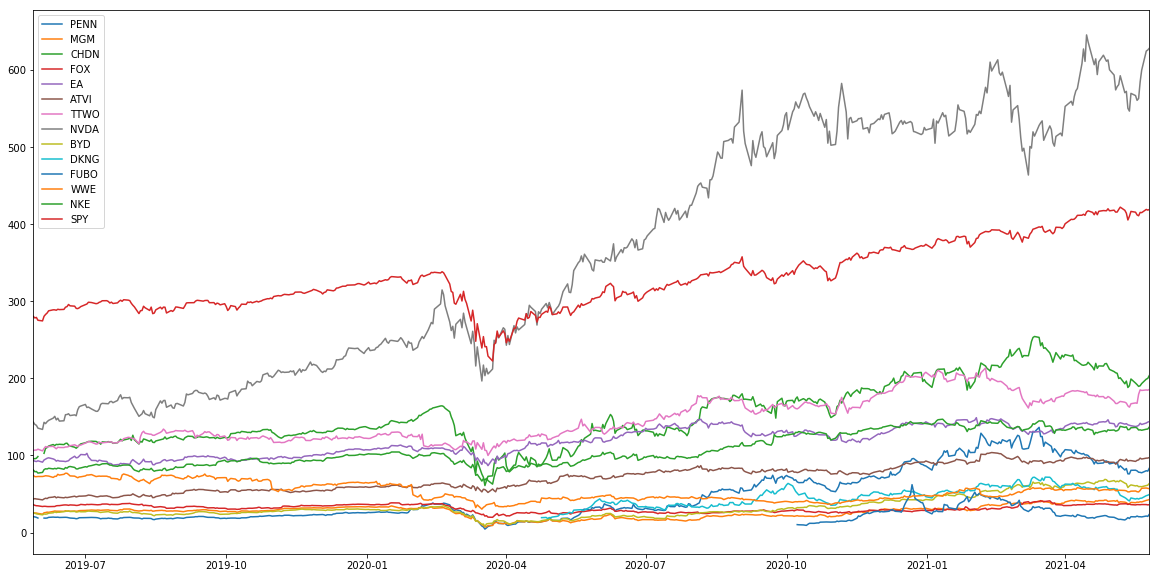

In [105]:
sp500_all_stocks_prices.plot(figsize=(20,10))

In [106]:
correlation = sp500_all_stocks_prices.corr()
correlation

,PENN,MGM,CHDN,FOX,EA,ATVI,TTWO,NVDA,BYD,DKNG,FUBO,WWE,NKE,SPY
PENN,1.000000,0.543710,0.959721,0.146212,0.791386,0.883506,0.895988,0.873190,0.879268,0.924541,0.688439,-0.256342,0.946063,0.909851
MGM,0.543710,1.000000,0.654424,0.837384,0.155721,0.250252,0.321871,0.227594,0.824506,0.812149,0.221313,0.495317,0.511094,0.692748
CHDN,0.959721,0.654424,1.000000,0.271698,0.759159,0.836329,0.855603,0.834863,0.905354,0.895945,0.467794,-0.165469,0.940191,0.952126
FOX,0.146212,0.837384,0.271698,1.000000,-0.218295,-0.160591,-0.134297,-0.191298,0.504939,0.730277,0.020486,0.704660,0.088157,0.320339
EA,0.791386,0.155721,0.759159,-0.218295,1.000000,0.961330,0.891450,0.926795,0.589970,0.420396,0.499330,-0.531257,0.808874,0.788387
ATVI,0.883506,0.250252,0.836329,-0.160591,0.961330,1.000000,0.914746,0.959860,0.701469,0.752470,0.507941,-0.527727,0.877098,0.843394
TTWO,0.895988,0.321871,0.855603,-0.134297,0.891450,0.914746,1.000000,0.910218,0.696855,0.662465,0.754095,-0.359056,0.908147,0.834871
NVDA,0.873190,0.227594,0.834863,-0.191298,0.926795,0.959860,0.910218,1.000000,0.684055,0.732120,-0.141132,-0.571346,0.906209,0.843700
BYD,0.879268,0.824506,0.905354,0.504939,0.589970,0.701469,0.696855,0.684055,1.000000,0.822181,0.163061,0.056521,0.828214,0.933005
DKNG,0.924541,0.812149,0.895945,0.730277,0.420396,0.752470,0.662465,0.732120,0.822181,1.000000,0.506256,0.543236,0.835867,0.783660


In [107]:
import seaborn as sns

In [116]:
import matplotlib.pyplot as plt

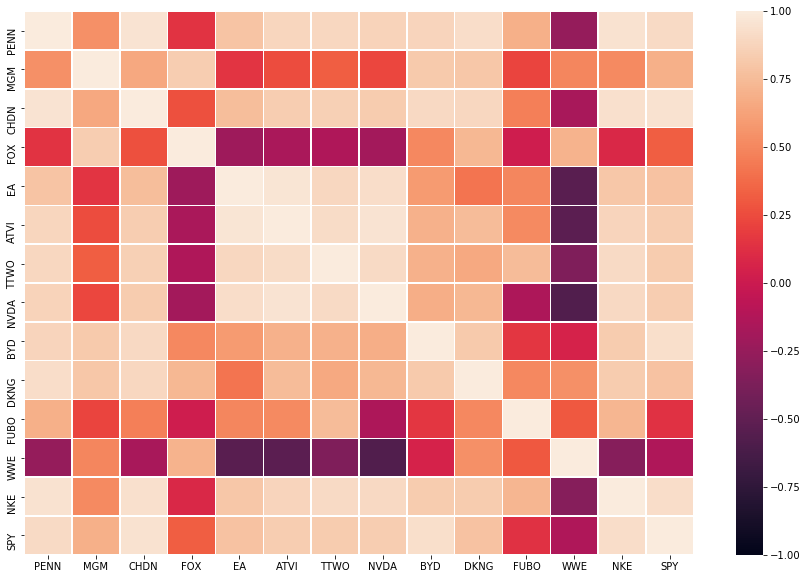

In [119]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, ax=ax, linewidth=.5)

In [120]:
ticker = ["PENN", "MGM", "CHDN", "FOX", "DKNG", "FUBO", "WWE", "NKE", "EA", "ATVI", "TTWO", "NVDA", "BYD", "SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2020-03-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-30", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
dip_rebound = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

dip_rebound.head()

ATVI                                    BYD  \
                            open    high     low  close   volume   open   
time                                                                      
2020-03-02 05:00:00+00:00  58.30  60.650  57.910  60.62  8461386  26.91   
2020-03-03 05:00:00+00:00  60.56  61.820  58.140  58.75  8843838  26.31   
2020-03-04 05:00:00+00:00  60.00  62.590  59.590  62.57  6198394  25.48   
2020-03-05 05:00:00+00:00  60.78  62.300  60.340  61.52  6102055  23.91   
2020-03-06 05:00:00+00:00  59.65  60.875  58.355  59.96  8486587  21.37   

                                                             ...    TTWO  \
                              high      low  close   volume  ...    open   
time                                                         ...           
2020-03-02 05:00:00+00:00  26.9100  25.2200  26.21  1674514  ...  108.58   
2020-03-03 05:00:00+00:00  26.8775  24.5200  24.75  1822125  ...  111.75   
2020-03-04 05:00:00+00:00  25.4800  23.9649  24.73  1721482  ...  113.44   
2020-03-05 05:00:00+00:00  23.9100  22.2538  22.45  2267447  ...  115.95   
2020-03-06 05:00:00+00:00  23.6000  21.0000  22.33  2331098  ...  113.70   

                                                              WWE         \
                             high     low   close   volume   open   high   
time                                                                       
2020-03-02 05:00:00+00:00  112.13  107.92  112.02  2014977  47.00  47.10   
2020-03-03 05:00:00+00:00  115.04  109.81  111.14  1710061  46.58  47.82   
2020-03-04 05:00:00+00:00  119.79  113.44  119.51  2187111  45.69  46.00   
2020-03-05 05:00:00+00:00  119.08  115.10  117.31  2052161  44.12  45.44   
2020-03-06 05:00:00+00:00  118.71  113.47  117.71  4532950  43.23  44.51   

                                                    
                               low  close   volume  
time                                                
2020-03-02 05:00:00+00:00  45.1050  46.35  1811367  
2020-03-03 05:00:00+00:00  44.4800  45.16  1524004  
2020-03-04 05:00:00+00:00  44.4300  44.97  1586525  
2020-03-05 05:00:00+00:00  43.7738  44.92  1211700  
2020-03-06 05:00:00+00:00  42.4400  42.79  1555232  

[5 rows x 70 columns]

In [122]:
dip_rebound_prices = pd.DataFrame()
dip_rebound_prices['PENN'] = dip_rebound['PENN']['close']
dip_rebound_prices['MGM'] = dip_rebound['MGM']['close']
dip_rebound_prices['CHDN'] = dip_rebound['CHDN']['close']
dip_rebound_prices['FOX'] = dip_rebound['FOX']['close']
dip_rebound_prices['EA'] = dip_rebound['EA']['close']
dip_rebound_prices['ATVI'] = dip_rebound['ATVI']['close']
dip_rebound_prices['TTWO'] = dip_rebound['TTWO']['close']
dip_rebound_prices['NVDA'] = dip_rebound['NVDA']['close']
dip_rebound_prices['BYD'] = dip_rebound['BYD']['close']
dip_rebound_prices['DKNG'] = dip_rebound['DKNG']['close']
dip_rebound_prices['FUBO'] = dip_rebound['FUBO']['close']
dip_rebound_prices['WWE'] = dip_rebound['WWE']['close']
dip_rebound_prices['NKE'] = dip_rebound['NKE']['close']
dip_rebound_prices['SPY'] = dip_rebound['SPY']['close']


dip_rebound_prices.index = dip_rebound_prices.index.date
dip_rebound_prices.head(10)

,PENN,MGM,CHDN,FOX,EA,ATVI,TTWO,NVDA,BYD,DKNG,FUBO,WWE,NKE,SPY
2020-03-02,28.230,25.06,128.47,31.77,106.91,60.620,112.02,276.570,26.21,NaN,NaN,46.35,92.69,309.08
2020-03-03,26.030,23.30,125.81,30.73,106.70,58.750,111.14,265.640,24.75,NaN,NaN,45.16,90.92,300.34
2020-03-04,26.050,23.29,130.05,30.67,111.83,62.570,119.51,284.560,24.73,NaN,NaN,44.97,93.79,312.91
2020-03-05,22.840,20.59,122.56,29.12,110.20,61.520,117.31,273.290,22.45,NaN,NaN,44.92,90.57,302.51
2020-03-06,23.905,20.39,117.68,28.52,107.65,59.960,117.71,266.070,22.33,NaN,NaN,42.79,88.38,297.42
2020-03-09,20.410,17.85,105.07,27.11,100.91,57.165,113.83,245.010,20.17,NaN,NaN,41.15,84.01,274.40
2020-03-10,23.030,20.80,110.79,28.77,103.39,60.720,118.75,261.080,21.93,NaN,NaN,41.19,88.34,288.44
2020-03-11,19.810,18.07,98.94,27.52,101.18,59.330,118.90,246.160,18.54,NaN,NaN,38.71,83.98,274.36
2020-03-12,15.430,15.25,77.01,25.56,93.22,54.560,108.35,216.035,14.54,NaN,NaN,32.38,74.20,248.10
2020-03-13,15.470,15.44,92.75,25.39,97.07,59.040,116.62,240.830,15.33,NaN,NaN,35.85,75.43,270.80


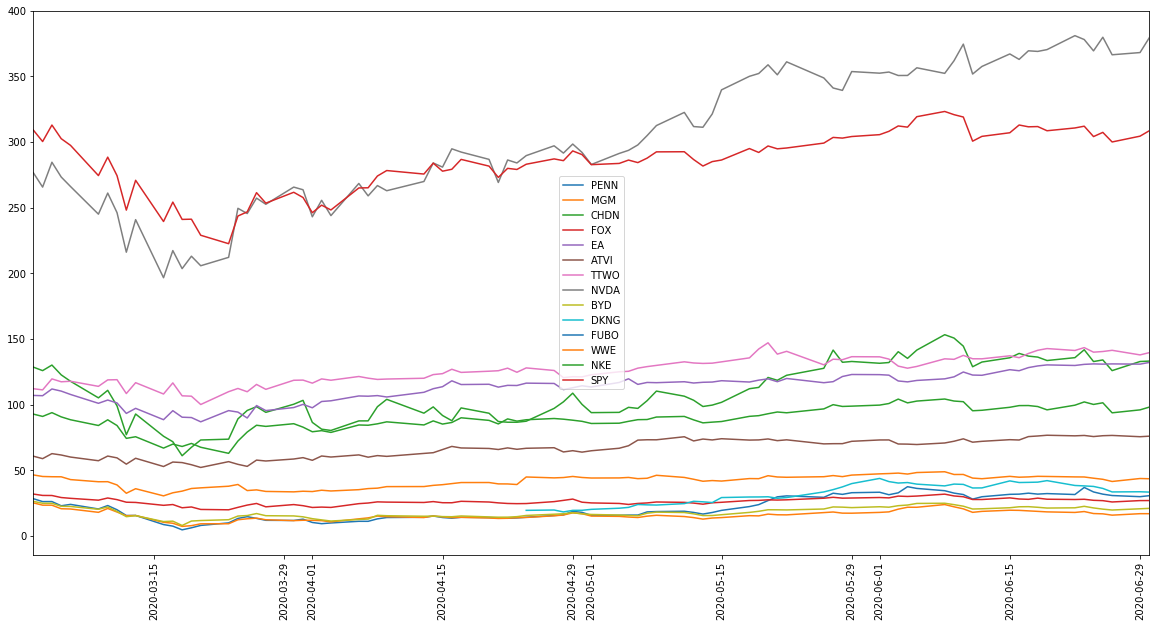

In [125]:
dip_rebound_prices.plot(figsize=(20,10), rot=90)

In [128]:
ticker = ["NVDA", "SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
crypto_sp500 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

crypto_sp500.head()

NVDA                                         SPY  \
                             open      high     low   close    volume    open   
time                                                                            
2019-05-28 00:00:00-04:00  145.86  147.1800  143.25  143.30   9185563  283.09   
2019-05-29 00:00:00-04:00  141.41  142.8200  138.94  140.31  13056864  278.91   
2019-05-30 00:00:00-04:00  140.31  141.7499  137.57  139.11   9231333  279.11   
2019-05-31 00:00:00-04:00  137.14  139.8548  135.39  135.46   8923463  276.21   
2019-06-03 00:00:00-04:00  135.91  137.4700  132.60  133.78  10726924  275.31   

                                                                
                               high      low   close    volume  
time                                                            
2019-05-28 00:00:00-04:00  284.1500  280.180  280.31  57121638  
2019-05-29 00:00:00-04:00  279.3600  276.710  278.38  88121995  
2019-05-30 00:00:00-04:00  280.0400  277.805  279.05  52483275  
2019-05-31 00:00:00-04:00  277.1200  275.240  275.37  67316713  
2019-06-03 00:00:00-04:00  276.5521  273.090  274.54  82473795

In [129]:
cryptp_sp500_prices = pd.DataFrame()
cryptp_sp500_prices['NVDA'] = crypto_sp500['NVDA']['close']
cryptp_sp500_prices['SPY'] = crypto_sp500['SPY']['close']
cryptp_sp500_prices.index = cryptp_sp500_prices.index.date
cryptp_sp500_prices.head(10)

,NVDA,SPY
2019-05-28,143.30,280.3100
2019-05-29,140.31,278.3800
2019-05-30,139.11,279.0500
2019-05-31,135.46,275.3700
2019-06-03,133.78,274.5400
2019-06-04,143.02,280.5200
2019-06-05,141.33,282.9000
2019-06-06,143.79,284.7400
2019-06-07,145.50,287.6300
2019-06-10,148.45,288.9305


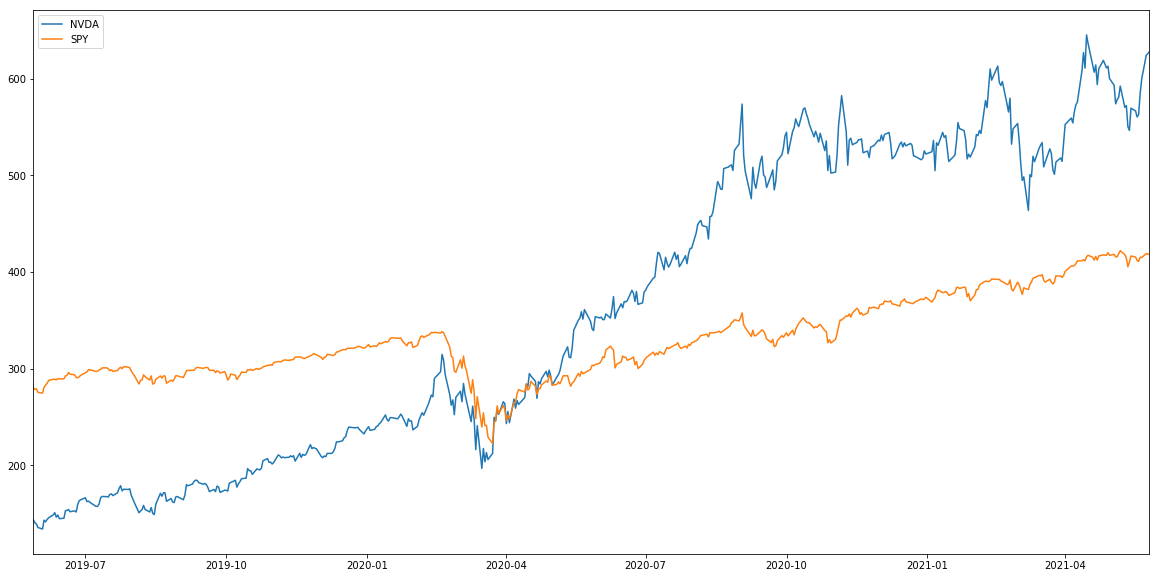

In [130]:
cryptp_sp500_prices.plot(figsize=(20,10))

In [149]:
from pathlib import Path

In [155]:
btc_path = Path("BTC-USD.csv")
eth_path = Path("ETH-USD.csv")

In [157]:
btc_df = pd.read_csv(btc_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
eth_df = pd.read_csv(eth_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [ ]:
#cumulative product 

In [158]:
combined_df = pd.concat([btc_df, eth_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,
2019-05-25,7991.885254,8117.925781,7965.976074,8052.543945,8052.543945,2.225681e+10,249.694046,257.356842,249.088791,251.759872,251.759872,8.924985e+09
2019-05-26,8055.206055,8687.520508,7924.670410,8673.215820,8673.215820,2.667797e+10,251.724792,269.166534,247.245392,267.069641,267.069641,9.664268e+09
2019-05-27,8674.072266,8907.174805,8668.705078,8805.778320,8805.778320,2.794984e+10,267.141876,278.507263,265.444702,272.862640,272.862640,1.207466e+10
2019-05-28,8802.757813,8807.016602,8634.721680,8719.961914,8719.961914,2.422692e+10,272.590485,274.320831,267.514374,271.768707,271.768707,1.036285e+10
2019-05-29,8718.591797,8755.852539,8482.728516,8659.487305,8659.487305,2.347348e+10,271.779053,273.756287,263.091400,269.455688,269.455688,9.819132e+09


In [160]:
combined_df.drop(columns=['Volume', 'Open', 'High', 'Low', 'Adj Close'], inplace=True)

combined_df.head()

,Close,Close
Date,,
2019-05-25,8052.543945,251.759872
2019-05-26,8673.215820,267.069641
2019-05-27,8805.778320,272.862640
2019-05-28,8719.961914,271.768707
2019-05-29,8659.487305,269.455688


In [161]:
combined_df.columns= ["BTC", "ETH"]
combined_df.head()

,BTC,ETH
Date,,
2019-05-25,8052.543945,251.759872
2019-05-26,8673.215820,267.069641
2019-05-27,8805.778320,272.862640
2019-05-28,8719.961914,271.768707
2019-05-29,8659.487305,269.455688


In [162]:
crypto_stocks_compare = pd.concat([combined_df, cryptp_sp500_prices], axis='columns', join="inner")

In [163]:
crypto_stocks_compare.head()

,BTC,ETH,NVDA,SPY
2019-05-28,8719.961914,271.768707,143.30,280.31
2019-05-29,8659.487305,269.455688,140.31,278.38
2019-05-30,8319.472656,255.858948,139.11,279.05
2019-05-31,8574.501953,268.113556,135.46,275.37
2019-06-03,8208.995117,252.607925,133.78,274.54


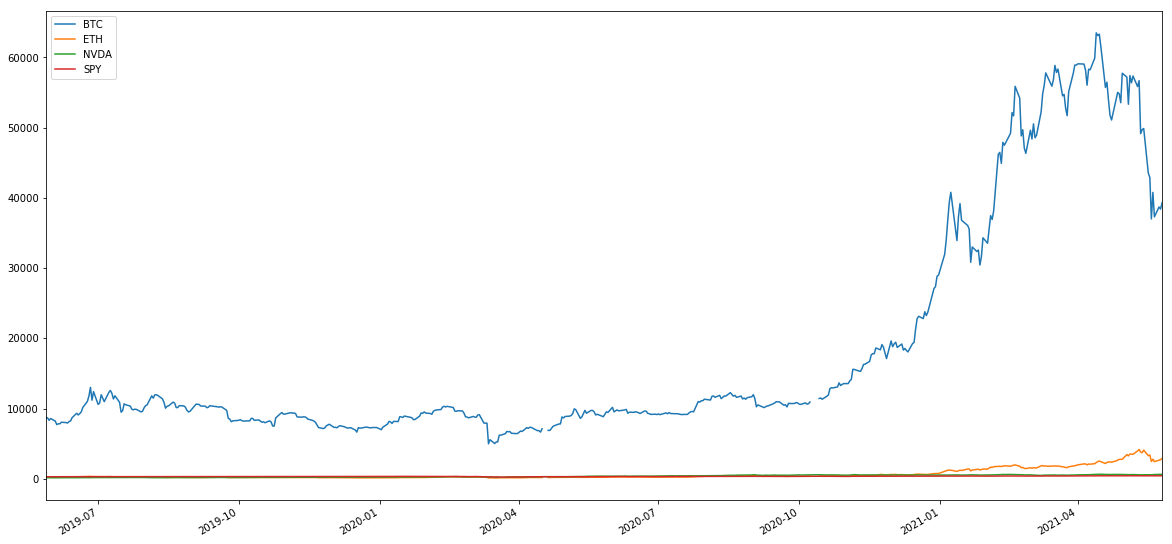

In [165]:
crypto_stocks_compare.plot(figsize=(20,10))

In [170]:
plot_crypto = crypto_stocks_compare.cumprod(axis=1)

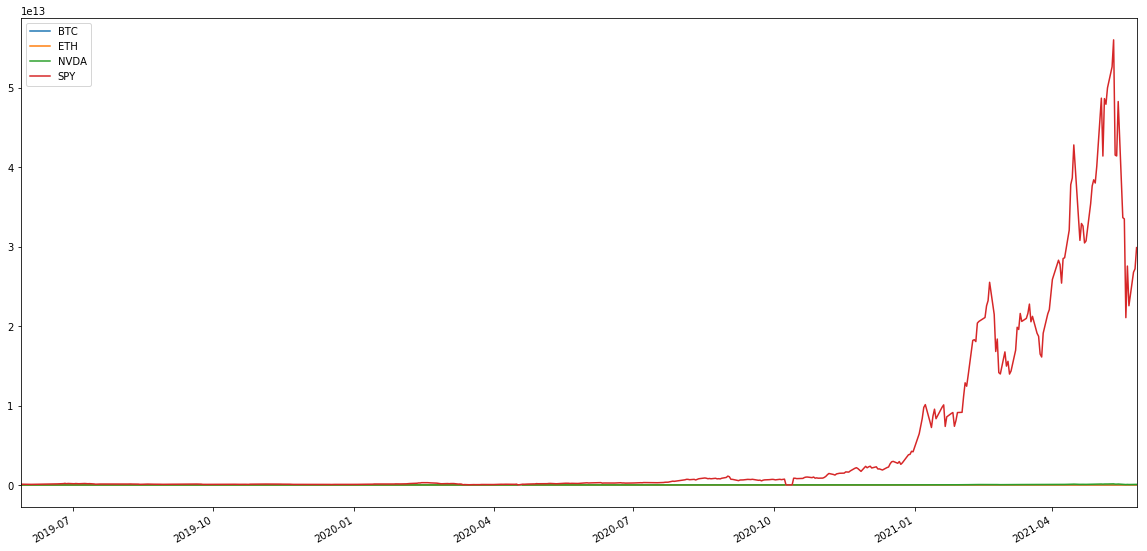

In [172]:
plot_crypto.plot(figsize=(20,10))

In [178]:
test = crypto_stocks_compare.pct_change()

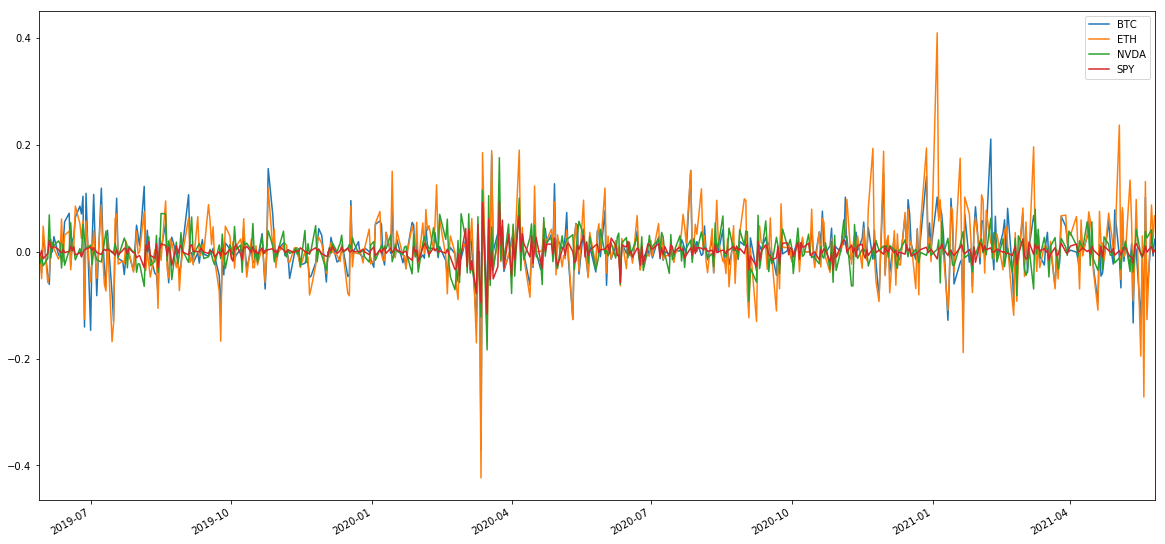

In [181]:
test.plot(figsize=(20,10))